接着分析中国1989年至2016年社会保障金支出情况：

In [2]:
import xlrd
import pprint
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [13]:
path = "./datas/人社部/09-02.xls"
data_outcome = xlrd.open_workbook(path)
table = data_outcome.sheets()[0]
# table = pd.DataFrame(table)

In [14]:
years = table.col_values(0, start_rowx=11, end_rowx=39)
total = table.col_values(1, start_rowx=11, end_rowx=39)
total = list(map(lambda x:int(x), total))
basic_pension_insurance = table.col_values(2, 11, 39)
unemployment_insurance = table.col_values(3, 11, 39)
urban_basic_medical_insurance = table.col_values(4, 11, 39)
work_injury_insurance = table.col_values(5, 11, 39)
maternity_insurance = table.col_values(6, 11, 39)

In [15]:
new = pd.DataFrame([years,total,basic_pension_insurance,unemployment_insurance,
                    urban_basic_medical_insurance,work_injury_insurance,maternity_insurance],
                   index=['years','total','basic_pension_insurance','unemployment_insurance',
                         'urban_basic_medical_insurance','work_injury_insurance','maternity_insurance'])
new= new.T

In [16]:
new.head()

,years,total,basic_pension_insurance,unemployment_insurance,urban_basic_medical_insurance,work_injury_insurance,maternity_insurance
0,1989,120,118.829,2,0,0,0
1,1990,151,149.336,2.5402,0,0,0
2,1991,176,173.071,3,0,0,0
3,1992,327,321.914,5.1,0,0,0
4,1993,482,470.63,9.3,1.3335,0.4144,0.5036


Text(0.5, 1.0, '历年社保支出组成变化')

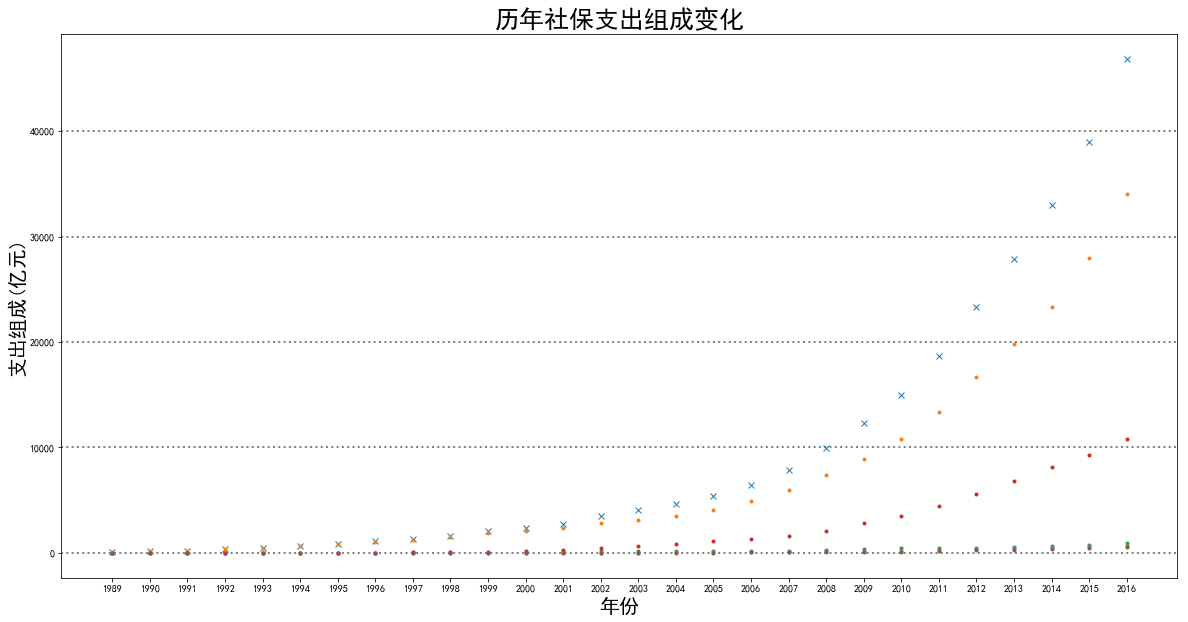

In [17]:
# 绘制点状效果图。此图的绘制不需要堆积，只需要展示在图片上。
# 没有图例版
plt.figure(figsize=(20,10))
plt.plot(years, total,'x', 
         years, basic_pension_insurance,'.',
         years, unemployment_insurance, '.',
         years, urban_basic_medical_insurance, '.',
         years, work_injury_insurance,'.',
         years, maternity_insurance,'.',)

# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

plt.xlabel("年份", fontsize=20)
plt.ylabel("支出组成(亿元)", fontsize=20)
plt.title("历年社保支出组成变化", fontsize=25)